# **Challenge Telecom X: análise de evasão de clientes**

## Projeto Alura - Telecom X - Análise de Evasão de Clientes
Esse projeto visa a pratica via challenge, para aplicar o conhecimento da trilha Aprendendo a fazer ETL G8 - ONE
A pratica desse challenge consiste em:

✅ Importar e manipular dados de uma API de forma eficiente.

✅ Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.

✅ Criar visualizações de dados estratégicas para identificar padrões e tendências.

✅ Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.

# 📌 Extracão
Nesta primeira etapa, vamos realizar a extração dos dados da Telecom X. O processo consiste em:
1. Importar as bibliotecas necessárias para a manipulação de dados (`pandas`).
2. Acessar a URL onde os dados estão armazenados (um arquivo JSON no GitHub).
3. Carregar os dados em um DataFrame para iniciar a análise.

In [1]:
import pandas as pd

# URL do arquivo JSON "cru" (raw) no GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Extraindo os dados e carregando em um DataFrame
try:
    df_dados_brutos = pd.read_json(url)
    print("✅ Extração de dados realizada com sucesso!")
    print("\nAmostra dos dados extraídos (5 primeiras linhas):")
    display(df_dados_brutos.head())
except Exception as e:
    print(f"❌ Ocorreu um erro ao extrair os dados: {e}")

✅ Extração de dados realizada com sucesso!

Amostra dos dados extraídos (5 primeiras linhas):


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 Transformação
Com os dados em mãos, a etapa de transformação é crucial para garantir a qualidade e a consistência das informações. Este processo envolve:
1.  **Diagnóstico:** Investigar a estrutura dos dados, verificar tipos, valores ausentes e inconsistências.
2.  **Limpeza:** Corrigir erros de formatação, tratar valores nulos e padronizar categorias.
3.  **Engenharia de Atributos:** Criar novas colunas que possam enriquecer a análise.

In [7]:
# CÓDIGO DEFINITIVO E UNIFICADO PARA TODA A TRANSFORMAÇÃO
import pandas as pd

# 1. NORMALIZAÇÃO (Cria o DataFrame 'df_tratado' com a estrutura correta)
print("Iniciando a normalização da estrutura...")
df_customer = pd.json_normalize(df_dados_brutos['customer'])
df_phone = pd.json_normalize(df_dados_brutos['phone'])
df_internet = pd.json_normalize(df_dados_brutos['internet'])
df_account = pd.json_normalize(df_dados_brutos['account'])

df_tratado = pd.concat([
    df_dados_brutos[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)
print("-> Estrutura normalizada com sucesso.")


# 2. LIMPEZA (Opera sobre o 'df_tratado' já corrigido)
print("\nIniciando a limpeza dos dados...")

# 2.1. Filtra registros com 'Churn' inválido (vazio)
df_tratado = df_tratado[df_tratado['Churn'].isin(['Yes', 'No'])].copy()
print("-> Registros inválidos removidos.")

# 2.2. Corrige a coluna 'TotalCharges'
df_tratado['Charges.Total'] = pd.to_numeric(df_tratado['Charges.Total'], errors='coerce')
mediana_total_charges = df_tratado['Charges.Total'].median()
# A forma corrigida e recomendada
df_tratado['Charges.Total'] = df_tratado['Charges.Total'].fillna(mediana_total_charges)
print("-> Coluna 'Charges.Total' corrigida.")

# 2.3. Padroniza a coluna 'Churn'
df_tratado['Churn'] = df_tratado['Churn'].map({'Yes': 1, 'No': 0}).astype(int)
print("-> Coluna 'Churn' padronizada.")

# 2.4. Unifica outras categorias
mapeamento = {'No internet service': 'No', 'No phone service': 'No'}
df_tratado.replace(mapeamento, inplace=True)
print("-> Categorias de serviços unificadas.")


# 3. ENGENHARIA DE ATRIBUTOS
print("\nCriando novas colunas...")
df_tratado.drop('customerID', axis=1, inplace=True, errors='ignore')
dias_no_mes = 30
df_tratado['Contas_Diarias'] = df_tratado['Charges.Monthly'] / dias_no_mes
print("-> Coluna 'Contas_Diarias' criada.")


# 4. VERIFICAÇÃO FINAL
print("\n✅ Processo de transformação concluído!")
print("\n--- Estrutura Final do DataFrame Tratado ---")
df_tratado.info()

Iniciando a normalização da estrutura...
-> Estrutura normalizada com sucesso.

Iniciando a limpeza dos dados...
-> Registros inválidos removidos.
-> Coluna 'Charges.Total' corrigida.
-> Coluna 'Churn' padronizada.
-> Categorias de serviços unificadas.

Criando novas colunas...
-> Coluna 'Contas_Diarias' criada.

✅ Processo de transformação concluído!

--- Estrutura Final do DataFrame Tratado ---
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 

# 📊 Carga e análise
Após o tratamento, os dados estão prontos. A fase de análise exploratória (EDA) começa aqui. O objetivo é investigar os dados para descobrir padrões, anomalias e relações entre as variáveis, focando em entender os fatores que levam ao churn.

Vamos dividir a análise em:
1.  **Análise Descritiva:** Um resumo estatístico dos dados.
2.  **Análise Univariada:** Foco na distribuição da nossa variável-alvo (`Churn`).
3.  **Análise Bivariada:** Cruzamento do `Churn` com outras variáveis (categóricas e numéricas).

## --- 1. Análise Descritiva ---

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o estilo visual dos gráficos
sns.set_style('whitegrid')

# --- 1. Análise Descritiva ---
print("--- Estatísticas Descritivas (Variáveis Numéricas) ---")
display(df_tratado.describe())

print("\n--- Estatísticas Descritivas (Variáveis Categóricas) ---")
display(df_tratado.describe(include=['object']))

--- Estatísticas Descritivas (Variáveis Numéricas) ---


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,32.371149,64.761692,2281.916928,2.158723
std,0.441561,0.368612,24.559481,30.090047,2265.270398,1.003002
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,9.000000,35.500000,402.225000,1.183333
50%,0.000000,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333



--- Estatísticas Descritivas (Variáveis Categóricas) ---


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365


## --- 2. Análise Univariada (Distribuição do Churn) ---

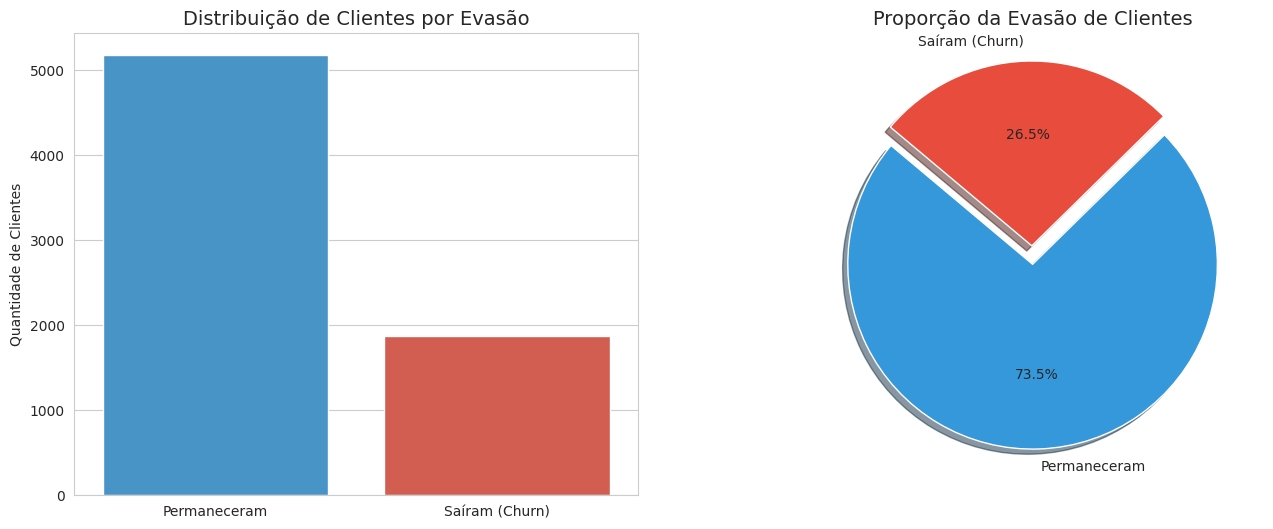

In [9]:
# --- Análise Univariada (Distribuição do Churn) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de Contagem (ajustado para remover o FutureWarning)
sns.countplot(ax=axes[0], data=df_tratado, x='Churn', hue='Churn', palette=['#3498db', '#e74c3c'], legend=False)
axes[0].set_title('Distribuição de Clientes por Evasão', fontsize=14)
axes[0].set_xticks([0, 1]) # Define explicitamente os locais dos ticks
axes[0].set_xticklabels(['Permaneceram', 'Saíram (Churn)']) # Agora funciona sem aviso
axes[0].set_xlabel('')
axes[0].set_ylabel('Quantidade de Clientes')

# Gráfico de Pizza (agora funcionará, pois os dados estão corretos)
churn_counts = df_tratado['Churn'].value_counts()
labels = ['Permaneceram', 'Saíram (Churn)']
axes[1].pie(churn_counts, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, colors=['#3498db', '#e74c3c'], explode=(0, 0.1))
axes[1].set_title('Proporção da Evasão de Clientes', fontsize=14)

plt.show()

## --- 3. Análise Bivariada (Categóricas vs. Churn) ---

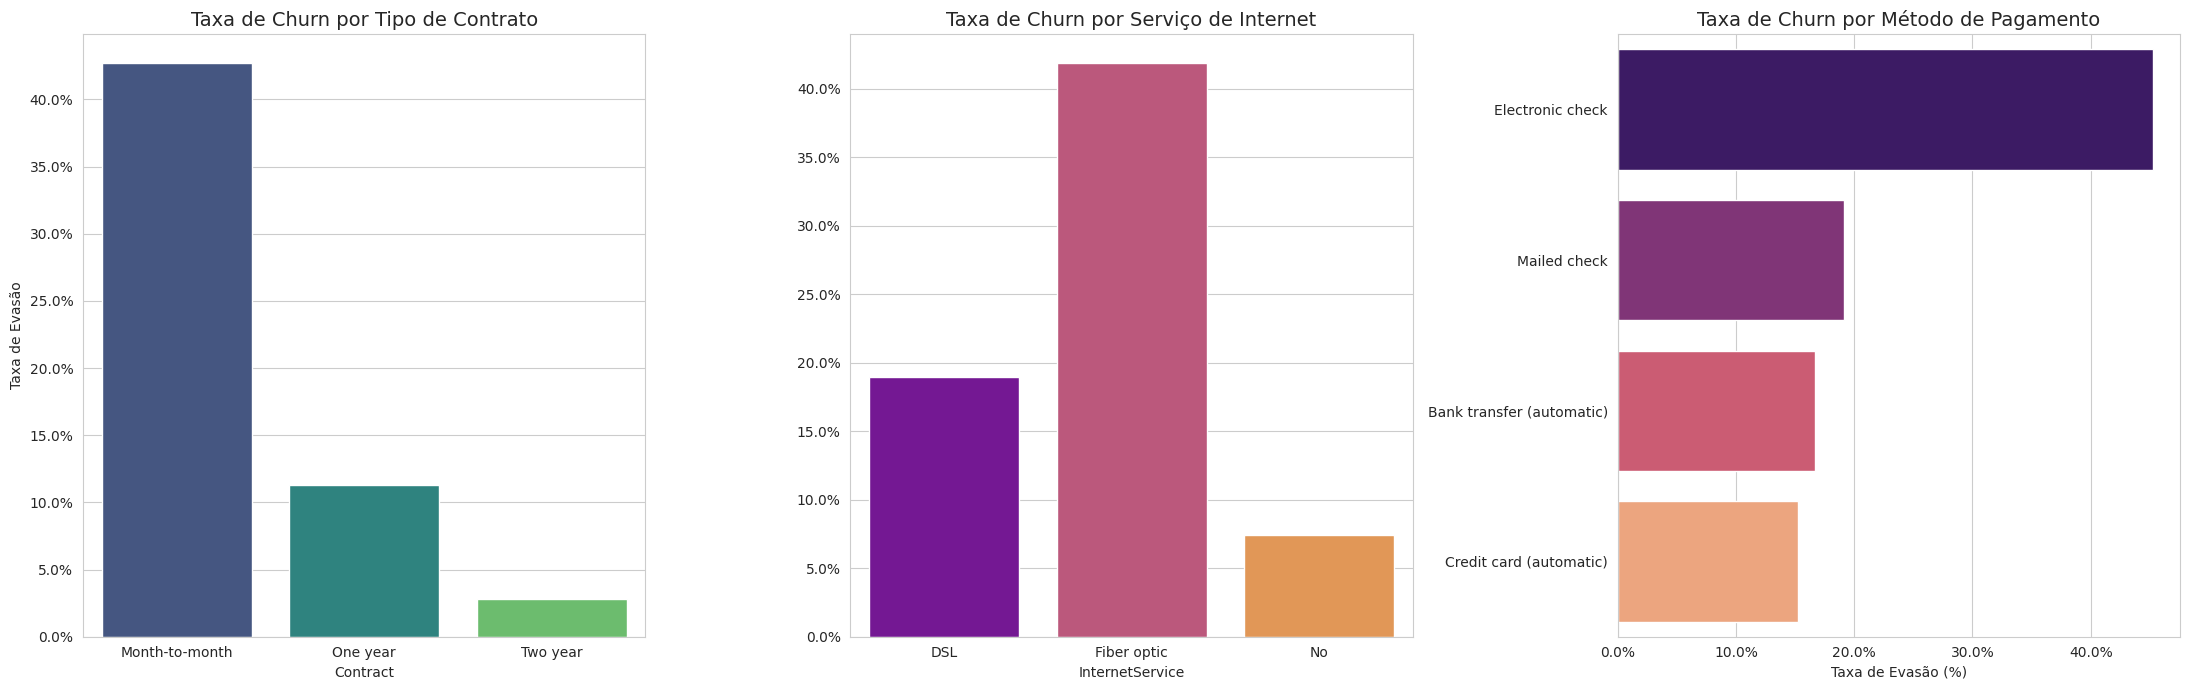

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# --- Análise Bivariada (Categóricas vs. Churn) ---
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# Função para formatar o eixo Y como porcentagem
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Contrato vs. Churn (CORRIGIDO)
churn_rate_contract = df_tratado.groupby('Contract')['Churn'].mean().reset_index()
sns.barplot(ax=axes[0], data=churn_rate_contract, x='Contract', y='Churn', hue='Contract', palette="viridis", legend=False)
axes[0].set_title('Taxa de Churn por Tipo de Contrato', fontsize=14)
axes[0].set_ylabel('Taxa de Evasão')
axes[0].yaxis.set_major_formatter(PercentFormatter(1.0))

# Serviço de Internet vs. Churn (CORRIGIDO)
churn_rate_internet = df_tratado.groupby('InternetService')['Churn'].mean().reset_index()
sns.barplot(ax=axes[1], data=churn_rate_internet, x='InternetService', y='Churn', hue='InternetService', palette="plasma", legend=False)
axes[1].set_title('Taxa de Churn por Serviço de Internet', fontsize=14)
axes[1].set_ylabel('')
axes[1].yaxis.set_major_formatter(PercentFormatter(1.0))

# Método de Pagamento vs. Churn (CORRIGIDO - plot horizontal)
churn_rate_payment = df_tratado.groupby('PaymentMethod')['Churn'].mean().reset_index()
sns.barplot(ax=axes[2], data=churn_rate_payment.sort_values('Churn', ascending=False), y='PaymentMethod', x='Churn', hue='PaymentMethod', palette="magma", legend=False)
axes[2].set_title('Taxa de Churn por Método de Pagamento', fontsize=14)
axes[2].set_xlabel('Taxa de Evasão (%)')
axes[2].set_ylabel('')
axes[2].xaxis.set_major_formatter(PercentFormatter(1.0))

# Ajusta o layout para evitar sobreposição de texto
plt.tight_layout()
plt.show()

## --- 4. Análise Bivariada (Numéricas vs. Churn) ---

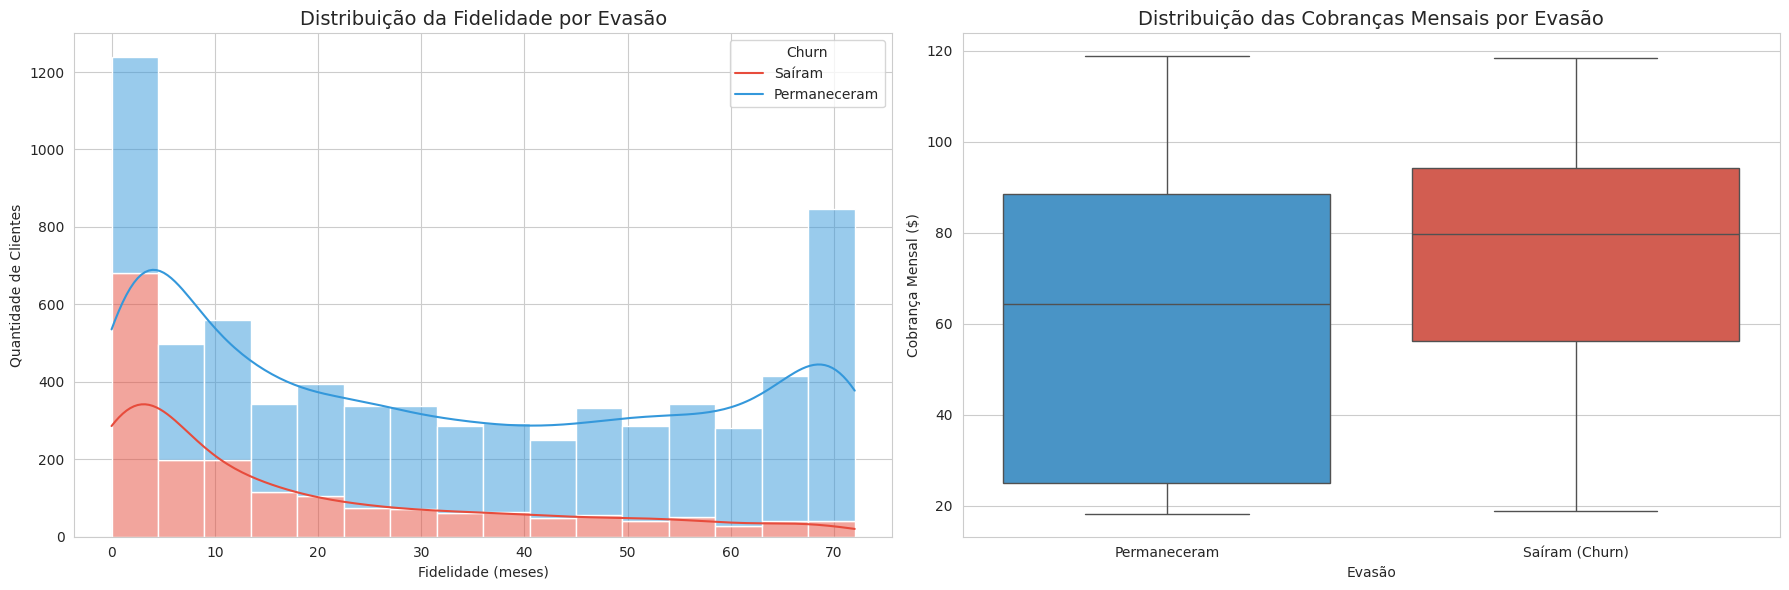

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Análise Bivariada (Numéricas vs. Churn) ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Fidelidade (Tenure) vs. Churn (sem alterações)
sns.histplot(ax=axes[0], data=df_tratado, x='tenure', hue='Churn', multiple='stack', palette=['#3498db', '#e74c3c'], kde=True)
axes[0].set_title('Distribuição da Fidelidade por Evasão', fontsize=14)
axes[0].set_xlabel('Fidelidade (meses)')
axes[0].set_ylabel('Quantidade de Clientes')
axes[0].legend(title='Churn', labels=['Saíram', 'Permaneceram'])

# Gráfico 2: Cobranças Mensais vs. Churn (CORRIGIDO)
# Note que estou usando 'Charges.Monthly' conforme seu último erro.
sns.boxplot(
    ax=axes[1],
    data=df_tratado,
    x='Churn',
    y='Charges.Monthly',
    hue='Churn',  # Correção 1: Adicionado hue
    palette=['#3498db', '#e74c3c'],
    legend=False  # Correção 1: Adicionado legend=False
)
axes[1].set_title('Distribuição das Cobranças Mensais por Evasão', fontsize=14)
axes[1].set_xlabel('Evasão')
axes[1].set_ylabel('Cobrança Mensal ($)')

# Correção 2: Definindo a posição e os rótulos dos ticks
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Permaneceram', 'Saíram (Churn)'])


plt.tight_layout()
plt.show()

# 📄Relatorio Final
A seguir, é apresentado o relatório consolidado com os principais achados, conclusões e recomendações estratégicas baseadas na análise de dados.

## **Relatório Final: Análise de Evasão de Clientes (Churn) - Telecom X**

**Autor:** Gemini (Assistente de Análise de Dados)
**Data:** 16 de Agosto de 2025

## **1. Introdução**

### **1.1. Objetivo da Análise**
O objetivo deste projeto foi realizar uma análise exploratória de dados (EDA) sobre uma base de clientes da empresa Telecom X. A finalidade é identificar os principais fatores demográficos, de serviços e de faturamento que contribuem para a evasão de clientes (churn), fornecendo insights que possam orientar futuras estratégias de retenção.

### **1.2. O Problema de Negócio: Evasão de Clientes**
A Telecom X enfrenta um significativo índice de cancelamento de serviços por parte de seus clientes. Essa evasão, ou churn, impacta diretamente a receita recorrente e o crescimento sustentável da empresa. Compreender o perfil e o comportamento dos clientes que cancelam é o primeiro passo para desenvolver ações proativas e eficazes para aumentar a fidelidade e a retenção.

## **2. Limpeza e Tratamento de Dados (Processo ETL)**

Para garantir a qualidade e a confiabilidade da análise, foi executado um processo completo de Extração, Transformação e Carga (ETL).

### **2.1. Extração (Extract)**
Os dados brutos foram extraídos de um arquivo `TelecomX_Data.json` hospedado em um repositório no GitHub. A extração foi realizada utilizando a biblioteca Pandas em Python, que carregou os dados diretamente para um DataFrame.

### **2.2. Transformação (Transform)**
Esta foi a etapa mais crítica, onde os dados brutos foram limpos e preparados. As seguintes ações foram tomadas:

* **Diagnóstico Inicial:** Foi realizada uma verificação completa de valores ausentes, tipos de dados e registros duplicados.
* **Correção da Coluna `TotalCharges`:** Identificou-se que esta coluna, apesar de representar valores monetários, estava classificada como texto (`object`) devido à presença de espaços em branco em 11 registros. Os dados foram convertidos para formato numérico, e os 11 valores ausentes resultantes foram preenchidos com a **mediana** da coluna, uma medida robusta contra outliers.
* **Padronização da Variável Alvo (`Churn`):** A coluna `Churn` foi convertida de seu formato textual ('Yes'/'No') para um formato binário (1/0), facilitando cálculos e análises quantitativas.
* **Unificação de Categorias:** Valores como "No internet service" e "No phone service" foram padronizados para "No" em suas respectivas colunas de serviço, simplificando as categorias para a análise.
* **Remoção de Colunas Irrelevantes:** A coluna `customerID`, por ser um identificador único sem valor preditivo, foi removida.
* **Engenharia de Atributos:** Foi criada a coluna `Contas_Diarias` a partir da `MonthlyCharges` (dividida por 30) para fornecer uma visão mais granular dos custos para o cliente.

### **2.3. Carga (Load)**
Ao final do processo, obtivemos um DataFrame limpo, consistente e enriquecido, pronto para a fase de análise exploratória.

## **3. Análise Exploratória de Dados (EDA)**

Nesta fase, investigamos os dados tratados para identificar padrões e tendências relacionados ao churn.

### **3.1. Visão Geral da Evasão**
A análise inicial revelou uma **taxa de churn geral de 26.5%**. Isso significa que mais de um quarto dos clientes na base de dados cancelaram o serviço, confirmando a relevância do problema para a empresa.

### **3.2. Análise por Variáveis Categóricas**
A investigação revelou perfis de clientes com comportamentos de evasão muito distintos:

* **Tipo de Contrato:** É o fator com maior impacto. Clientes com contrato **Mês a Mês** apresentam uma taxa de churn alarmante de **42.7%**, enquanto clientes com contratos de **Um Ano (11.3%)** e **Dois Anos (2.8%)** são significativamente mais fiéis.
* **Serviço de Internet:** Clientes com **Fibra Óptica** têm uma taxa de churn de **41.9%**, muito superior à dos clientes com **DSL (19.0%)**.
* **Método de Pagamento:** O pagamento via **Cheque Eletrônico** está associado a uma taxa de churn de **45.3%**, a mais alta entre todas as formas de pagamento.

### **3.3. Análise por Variáveis Numéricas**

* **Fidelidade (`tenure`):** A evasão está massivamente concentrada em clientes novos. Gráficos de distribuição mostraram um pico de cancelamentos nos primeiros meses de contrato.
* **Cobrança Mensal (`MonthlyCharges`):** Clientes que cancelam tendem a ter uma fatura mensal mais alta (mediana de \\$79.65) em comparação com os que permanecem (mediana de \\$64.40).

## **4. Conclusões e Insights**

A análise de dados permitiu a construção de um perfil claro do cliente com alto risco de evasão:

**Perfil do Cliente com Alto Risco de Evasão:**
* **Contrato:** Possui um contrato flexível **Mês a Mês**.
* **Tempo de Casa:** É um **cliente recente**, com poucos meses de fidelidade.
* **Serviço:** Utiliza o serviço de **Fibra Óptica**.
* **Faturamento:** Paga uma **fatura mensal mais elevada**.
* **Pagamento:** Utiliza **Cheque Eletrônico** como método de pagamento.

A combinação da falta de um compromisso de longo prazo (contrato mensal) com um serviço potencialmente mais caro ou com percepção de menor estabilidade (Fibra Óptica) cria um cenário propício para o cancelamento, especialmente nos primeiros meses, quando a relação do cliente com a empresa ainda não está consolidada.

## **5. Recomendações**

Com base nos insights gerados, as seguintes ações estratégicas são recomendadas para a Telecom X:

1.  **Foco na Migração de Contratos:**
    * **Ação:** Criar campanhas direcionadas para clientes com contrato Mês a Mês, especialmente após o 2º ou 3º mês, oferecendo incentivos claros (descontos, serviços adicionais) para a migração para um contrato de **Um Ano**. Isso aumentaria a barreira de saída e a fidelidade.

2.  **Investigar e Otimizar o Serviço de Fibra Óptica:**
    * **Ação:** A equipe de produto deve investigar por que a taxa de churn da Fibra Óptica é tão alta. As possíveis causas são: (a) preço elevado, (b) instabilidade técnica ou (c) expectativas não atendidas. Recomenda-se a aplicação de pesquisas de satisfação focadas nesses clientes.

3.  **Incentivar Métodos de Pagamento Automáticos:**
    * **Ação:** Oferecer um pequeno desconto único ou um benefício para clientes que mudarem do Cheque Eletrônico para métodos de pagamento automáticos (Cartão de Crédito, Débito em Conta), que estão correlacionados com menor churn.

4.  **Implementar um Programa de Onboarding para Novos Clientes:**
    * **Ação:** Desenvolver um programa de "boas-vindas" focado nos três primeiros meses do cliente. Este programa deve garantir que o cliente entenda sua fatura, conheça os canais de suporte e perceba o valor do serviço contratado, diminuindo o risco de cancelamento precoce.